In [1]:
# 导入所需要的模块与包
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 转换特征值的数据类型并进行标准化处理
x_train, x_test = tf.cast(x_train, dtype=tf.float32)/255.0, tf.cast(x_test, dtype=tf.float32)/255.0

# 转换标签值的数据类型
y_train, y_test = tf.cast(y_train, dtype=tf.int32), tf.cast(y_test, dtype=tf.int32)

# 显示数据集的特征值和标签值的 shape 属性值
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


In [2]:
# 生成网络模型
model=tf.keras.models.Sequential([
  # 创建卷积层1
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu, input_shape=x_train.shape[1:]),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1), padding='same'),
  tf.keras.layers.Dropout(0.2), 

  # 创建卷积层2
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu), 
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1), padding='same'),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(), # 创建拉伸层
    
  # 创建全连接层
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2), #创建Dropout层
    
  # 创建全连接层
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5), #创建Dropout层
    
  # 创建全连接层作为输出层
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

C:\Users\siyu_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 32, 32, 32)        │            896 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 32, 32, 32)        │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout (Dropout)                  │ (None, 32, 32, 32)        │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 32, 32, 64)        │         18,496 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 32, 32, 64)        │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_1 (Dropout)                │ (None, 32, 32, 64)        │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ flatten (Flatten)                  │ (None, 65536)             │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense (Dense)                      │ (None, 512)               │     33,554,944 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_2 (Dropout)                │ (None, 512)               │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_1 (Dense)                    │ (None, 256)               │        131,328 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_3 (Dropout)                │ (None, 256)               │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_2 (Dense)                    │ (None, 10)                │          2,570 │
└────────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 33,708,234 (128.59 MB)

 Trainable params: 33,708,234 (128.59 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 编译网络模型
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])
# 训练网络模型
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
# 评估网络模型
model.evaluate(x_test,y_test,batch_size=64,verbose=2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 163ms/step - loss: 1.9249 - sparse_categorical_accuracy: 0.3070 - val_loss: 1.4463 - val_sparse_categorical_accuracy: 0.4775
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - loss: 1.3858 - sparse_categorical_accuracy: 0.5030 - val_loss: 1.2536 - val_sparse_categorical_accuracy: 0.5531
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - loss: 1.1664 - sparse_categorical_accuracy: 0.5860 - val_loss: 1.0877 - val_sparse_categorical_accuracy: 0.6142
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - loss: 1.0314 - sparse_categorical_accuracy: 0.6389 - val_loss: 1.0327 - val_sparse_categorical_accuracy: 0.6436
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 169ms/step - loss: 0.9043 - sparse_categorical_accuracy: 0.6839 - val_loss: 0.9647 - val_sparse_categorical_accuracy: 0.6657
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - loss: 0.7863 - sparse_categorical_accuracy: 0.7241 - val_loss: 0.9508 - val_sparse_categorical_acc

[1.0719108581542969, 0.6758000254631042]

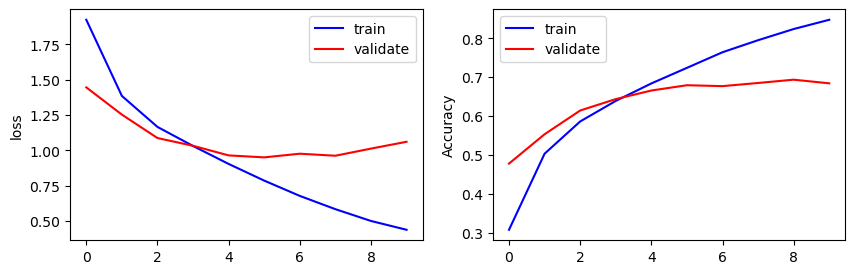

In [4]:
# 读取history的history属性
loss=history.history['loss']    # 训练集损失函数值

# 训练集准确率
acc=history.history['sparse_categorical_accuracy']
val_loss=history.history['val_loss']    # 验证集损失函数值

# 验证集准确率
val_acc=history.history['val_sparse_categorical_accuracy']


# 创建画布并设置画布的大小
plt.figure(figsize=(10,3))

#子图1中绘制损失函数值的折线图
plt.subplot(121)
plt.plot(loss,color='b',label='train')
plt.plot(val_loss,color='r',label='validate')
plt.ylabel('loss')
plt.legend()

# 在子图2中绘制准确率的折线图
plt.subplot(122)
plt.plot(acc,color='b',label='train')
plt.plot(val_acc,color='r',label='validate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


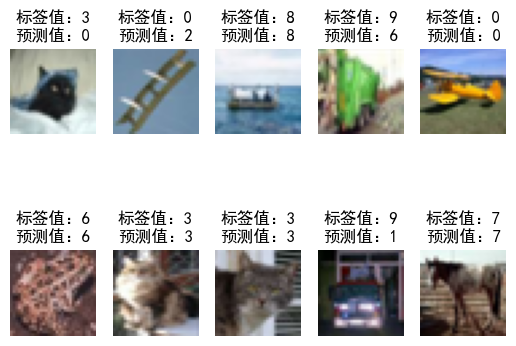

In [6]:
# 应用cnn
plt.figure()
for i in range(10):
  n=np.random.randint(1,10000)    # 生成随机整数n
  plt.subplot(2,5,i+1)    # 创建子图
  plt.axis("off")    # 设置不显示坐标轴
    
  plt.rcParams['font.sans-serif']=['SimHei']
  plt.imshow(x_test[n],cmap='gray')    # 绘图
  demo=tf.reshape(x_test[n],(1,32,32,3))
    
     # 应用网络模型
  y_pred=np.argmax(model.predict(demo))   
  title="标签值："+str((y_test.numpy())[n,0])+"\n预测值："+str(y_pred)
  plt.title(title) 
    
plt.show()